# DSCI 503 - Homework 07
### Talaya Francois

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

## Problem 1: NYC Restaurants Dataset 

In [2]:
nyc = pd.read_csv('nyc.txt', sep='\t')
nyc.head(10)

,Price,Food,Decor,Service,Wait,East
0,43,22,18,20,36,0
1,32,20,19,19,22,0
2,34,21,13,18,20,0
3,41,20,20,17,25,0
4,54,24,19,21,32,0
5,52,22,22,21,15,0
6,34,22,16,21,25,0
7,34,20,18,21,21,1
8,39,22,19,22,23,1
9,44,21,17,19,27,1


In [3]:
X1 = nyc[['Food', 'Decor', 'Service', 'Wait', 'East']].values 
y1 = nyc['Price'].values
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.2, random_state=1)
print(f"Training Features Shape: {X_train.shape}\nTest Features Shape: {X_test.shape}")

Training Features Shape: (134, 5)
Test Features Shape: (34, 5)


In [4]:
nyc_mod = LinearRegression()
nyc_mod.fit(X_train, y_train)

print('Intercept:', nyc_mod.intercept_)
print('Slope:    ', nyc_mod.coef_)

Intercept: -23.755435322488893
Slope:     [ 1.55693926  2.00700907 -0.25440527  0.09203064  2.63235537]


In [5]:
train_r2 = nyc_mod.score(X_train, y_train)
test_r2 = nyc_mod.score(X_test, y_test)

print('Training r-Squared:', round(train_r2,4))
print('Testing r-Squared: ', round(test_r2,4))

Training r-Squared: 0.6306
Testing r-Squared:  0.6245


In [6]:
test_pred_1 = nyc_mod.predict(X_test)
print(f"Observed Prices:  {y_test[:10]}\nEstimated Prices: {np.round(test_pred_1[:10], 2)}")

Observed Prices:  [33 45 54 38 22 47 38 51 46 47]
Estimated Prices: [39.2  38.09 49.35 39.26 19.72 47.4  36.85 50.07 48.26 43.01]


In [7]:
nyc_new_dict = {
    "Food":[22, 18, 25],
    "Decor":[12, 19, 22],
    "Service":[20, 22, 18],
    "Wait":[15, 34, 36],
    "East":[0, 1, 0]
}

nyc_new = pd.DataFrame(nyc_new_dict)
new_pred_1 = nyc_mod.predict(nyc_new)
new_pred_1 = np.round(new_pred_1, 2)
print(f"Estimated Prices: {new_pred_1}")

Estimated Prices: [30.87 42.57 58.06]


C:\Users\talay\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


## Problem 2: Diamonds Dataset 

In [8]:
diamonds = pd.read_csv('diamonds.txt', sep='\t')
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [9]:
diamonds.loc[:, 'ln_carat'] = np.log(diamonds.loc[:, 'carat'])
diamonds.loc[:, 'ln_price'] = np.log(diamonds.loc[:, 'price'])
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,ln_carat,ln_price
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,-1.469676,5.786897
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,-1.560648,5.786897
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,-1.469676,5.789960
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,-1.237874,5.811141
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,-1.171183,5.814131


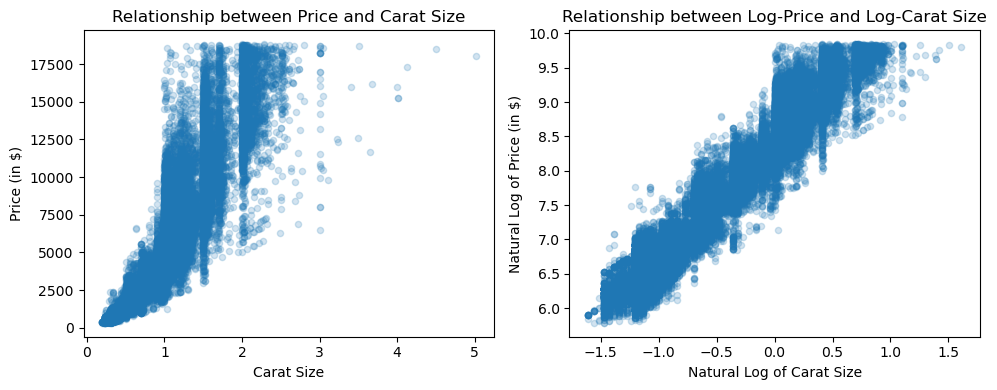

In [10]:
plt.figure(figsize=[10, 4])  
x1 = diamonds.loc[:, 'carat'] # carat size
y1 = diamonds.loc[:, 'price'] # price

x2 = diamonds.loc[:, 'ln_carat'] # log carat size
y2 = diamonds.loc[:, 'ln_price'] # log price
plt.subplot(1, 2, 1)
plt.scatter(
        x1,
        y1,
        s=20,  
        alpha=0.2,       
    )
   
plt.title("Relationship between Price and Carat Size")
plt.xlabel("Carat Size")
plt.ylabel("Price (in $)")

plt.subplot(1, 2, 2)
plt.scatter(
        x2,
        y2,
        s=20,      
        alpha=0.2,       
    )

plt.title("Relationship between Log-Price and Log-Carat Size")
plt.xlabel("Natural Log of Carat Size")
plt.ylabel("Natural Log of Price (in $)")

plt.tight_layout()
plt.show()

In [11]:
X2 = diamonds[['ln_carat']].values 
y2 = diamonds['ln_price'].values
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X2, y2, test_size = 0.1, random_state=1)
print(f"Training Features Shape: {X_train_2.shape}\nTest Features Shape: {X_test_2.shape}")

Training Features Shape: (48546, 1)
Test Features Shape: (5394, 1)


In [12]:
dia_mod = LinearRegression()
dia_mod.fit(X_train_2, y_train_2)

print('Intercept:', dia_mod.intercept_)
print('Slope:    ', dia_mod.coef_)

Intercept: 8.448298621179152
Slope:     [1.67493107]


In [13]:
train_r2_2 = dia_mod.score(X_train_2, y_train_2)
test_r2_2 = dia_mod.score(X_test_2, y_test_2)

print('Training r-Squared:', round(train_r2_2,4))
print('Testing r-Squared: ', round(test_r2_2,4))

Training r-Squared: 0.933
Testing r-Squared:  0.9328


In [14]:
test_pred_2 = dia_mod.predict(X_test_2)
observed_prices = np.exp(y_test_2[:10])
estimated_prices = np.exp(test_pred_2[:10])

# Round and print
print(f"Observed Prices:  {np.round(observed_prices)}")
print(f"Estimated Prices: {np.round(estimated_prices)}")

Observed Prices:  [ 564. 5914. 2562.  537. 5964.  984. 5247.  611. 9645. 1162.]
Estimated Prices: [ 729. 6334. 2096.  766. 6334. 1612. 5309. 1048. 9204.  804.]


In [15]:
diamonds_new = np.log([[0.5, 1.0, 1.5, 2.0, 2.5, 3.0]]).reshape(-1, 1)
new_pred_2 = dia_mod.predict(diamonds_new)
new_pred_2 = np.exp(new_pred_2)
new_pred_2 = np.round(new_pred_2)
print(f"Estimated Prices: {new_pred_2}")

Estimated Prices: [ 1462.  4667.  9204. 14902. 21656. 29390.]


## Problem 3: Heart Disease Dataset

In [16]:
hd = pd.read_csv('heart_disease.txt', sep='\t')
hd.head(10)

,age,sex,chest_pain_type,resting_bp,serum_chol,fasting_blood_sugar,electrocardio,max_heart_rate,exercise_induced_angina,oldpeak,slope,major_vessels,thal,heart_disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,2
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,1
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,2
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,1
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,1
5,65,1,4,120,177,0,0,140,0,0.4,1,0,7,1
6,56,1,3,130,256,1,2,142,1,0.6,2,1,6,2
7,59,1,4,110,239,0,2,142,1,1.2,2,1,7,2
8,60,1,4,140,293,0,2,170,0,1.2,2,2,7,2
9,63,0,4,150,407,0,2,154,0,4.0,2,3,7,2


In [17]:
X3 = (hd[['age', 'sex', 'chest_pain_type', 'resting_bp', 
          'serum_chol', 'fasting_blood_sugar', 'electrocardio', 
          'max_heart_rate', 'exercise_induced_angina', 'oldpeak', 
          'slope', 'major_vessels', 'thal']].values
     )
y3 = hd['heart_disease'].values
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X3, y3, test_size = 0.2, random_state=1, stratify=y3)
print(f"Training Features Shape: {X_train_3.shape}\nTest Features Shape: {X_test_3.shape}")

Training Features Shape: (216, 13)
Test Features Shape: (54, 13)


In [18]:
hd_mod = LogisticRegression(solver='lbfgs', penalty='l2',  max_iter=2000) # penalty="none" returns error, error says to set penalty to "l2"
hd_mod.fit(X_train_3, y_train_3)

print(f"""Intercept:  {hd_mod.intercept_}
Coefficients: 
{hd_mod.coef_}""")

Intercept:  [-8.25543286]
Coefficients: 
[[-0.03270237  1.29360607  0.70339795  0.02161116  0.01211576 -0.43261402
   0.3328765  -0.01955934  0.57278941  0.37705894  0.18848587  0.94586762
   0.41206972]]


In [19]:
train_acc1 = hd_mod.score(X_train_3, y_train_3)
test_acc1 = hd_mod.score(X_test_3, y_test_3)

print('Training Accuracy:', round(train_acc1, 4))
print('Testing Accuracy: ', round(test_acc1, 4))

Training Accuracy: 0.8565
Testing Accuracy:  0.8148


In [20]:
test_pred_3 = hd_mod.predict(X_test_3)
print('Observed Labels: ', y_test_3[:20])
print('Predicted Labels:', test_pred_3[:20])

Observed Labels:  [2 2 2 1 1 2 1 1 2 1 2 1 1 1 2 1 1 1 2 1]
Predicted Labels: [2 2 2 1 1 2 1 1 2 1 2 1 1 1 2 1 1 1 2 1]


In [21]:
probabilities = hd_mod.predict_proba(X_test_3[:10])
probabilities_df = pd.DataFrame(probabilities, columns=['Class 1', 'Class 2'])
probabilities_df

,Class 1,Class 2
0,0.021177,0.978823
1,0.053439,0.946561
2,0.046094,0.953906
3,0.859950,0.140050
4,0.874273,0.125727
5,0.070636,0.929364
6,0.930130,0.069870
7,0.925500,0.074500
8,0.016243,0.983757
9,0.993614,0.006386


## Problem 4: Gapminder Dataset

In [22]:
gm = pd.read_csv('gapminder_data.txt', sep='\t')
gm18= gm[gm['year'] == 2018]
gm18.head(10)

,country,year,continent,population,life_exp,gdp_per_cap,gini
40112,Afghanistan,2018,asia,36400000,58.7,1870,36.8
40113,Albania,2018,europe,2930000,78.0,12400,29.0
40114,Algeria,2018,africa,42000000,77.9,13700,27.6
40115,Angola,2018,africa,30800000,65.2,5850,42.6
40116,Antigua and Barbuda,2018,americas,103000,77.6,21000,40.0
40117,Argentina,2018,americas,44700000,77.0,18900,42.4
40118,Armenia,2018,europe,2930000,76.0,8660,32.6
40119,Australia,2018,asia,24800000,82.9,45800,32.3
40120,Austria,2018,europe,8750000,81.8,44600,30.5
40121,Azerbaijan,2018,europe,9920000,72.3,16600,32.4


In [23]:
X4 = gm18[['life_exp', 'gdp_per_cap', 'gini']].values
y4 = gm18['continent'].values
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(X4, y4, test_size = 0.3, random_state=1, stratify=y4)
print(f"Training Features Shape: {X_train_4.shape}\nTest Features Shape: {X_test_4.shape}")

Training Features Shape: (128, 3)
Test Features Shape: (56, 3)


In [24]:
# WARNING: lbfgs failed to converge even at max_iter=10000.
# penalty="none" returns error, error says to set penalty to "l2"
# Proceeding with output as-is, per assignment instructions.

gm_mod = LogisticRegression(solver='lbfgs', penalty='l2', multi_class='multinomial', max_iter=10000) 
gm_mod.fit(X_train_4, y_train_4)

print(f"""Intercept:  {gm_mod.intercept_}
Coefficients: 
{gm_mod.coef_}""")

C:\Users\talay\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Intercept:  [ 13.70063708 -25.46373273  18.41459358  -6.65149789]
Coefficients: 
[[-2.44606821e-01 -4.18210165e-05  1.33520406e-01]
 [ 2.05890966e-01 -1.98092373e-05  2.69735303e-01]
 [-2.03460576e-01  4.58494977e-05 -8.18480320e-02]
 [ 2.42176563e-01  1.57807474e-05 -3.21408089e-01]]


C:\Users\talay\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [25]:
train_acc2 = gm_mod.score(X_train_4, y_train_4)
test_acc2 = gm_mod.score(X_test_4, y_test_4)

print('Training Accuracy:', round(train_acc2, 4))
print('Testing Accuracy: ', round(test_acc2, 4))

Training Accuracy: 0.6953
Testing Accuracy:  0.6607


In [26]:
test_pred_4 = hd_mod.predict(X_test_3)
print('Observed Labels: ', y_test_4[:8])
print('Predicted Labels:', test_pred_4[:8])

Observed Labels:  ['americas' 'asia' 'asia' 'asia' 'africa' 'europe' 'asia' 'europe']
Predicted Labels: [2 2 2 1 1 2 1 1]


In [27]:
probabilities2 = gm_mod.predict_proba(X_test_4[:10])
probabilities2_df = pd.DataFrame(probabilities2, columns=['africa', 'americas', 'asia', 'europe'])
probabilities2_df

,africa,americas,asia,europe
0,0.089668,0.493348,0.278484,0.138499
1,0.002853,0.073966,0.119288,0.803892
2,0.652733,0.000306,0.346816,0.000145
3,0.336412,0.095792,0.524890,0.042907
4,0.002803,0.002777,0.067155,0.927265
5,0.008699,0.006853,0.334050,0.650398
6,0.703997,0.013098,0.281698,0.001208
7,0.000085,0.000387,0.016930,0.982598
8,0.005685,0.002601,0.248349,0.743366
9,0.188278,0.117731,0.405641,0.288351


In [28]:
gm_new = pd.DataFrame({
    'life_exp': [75, 75, 75, 75, 75, 75],
    'gdp_per_cap': [5000, 5000, 5000, 20000, 20000, 20000],
    'gini': [30, 40, 50, 30, 40, 50]
})
probabilities3 = gm_mod.predict_proba(gm_new)
probabilities3 = probabilities3.round(3)
probabilities3_df = pd.DataFrame(probabilities3, columns=['africa', 'americas', 'asia', 'europe'])
probabilities3_df

C:\Users\talay\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


,africa,americas,asia,europe
0,0.042,0.013,0.250,0.694
1,0.327,0.392,0.224,0.057
2,0.174,0.812,0.014,0.000
3,0.016,0.007,0.353,0.624
4,0.177,0.296,0.454,0.073
5,0.128,0.834,0.038,0.001


According to our model: 
* Country 0 is most likely in Europe.
*  Country 1 is most likely in Africa. 
* Country 2 is most likely in Africa. 
* Country 3 is most likely in Europe. 
* Country 4 is most likely in Asia. 
* Country 5 is most likely in Americas.